# Exploration du fichier source 'title.basics.tsv'

In [2]:
# 1. Importer les bibliothèques nécessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Charger le fichier TSV

df_title_basics = pd.read_csv("C:/Users/vieas/Documents/GitHub/Movie-recommendation-project/gitignore/title.basics.tsv",sep='\t')

C:\Users\vieas\AppData\Local\Temp\ipykernel_25188\1707099459.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv("C:/Users/vieas/Documents/GitHub/Movie-recommendation-project/gitignore/title.basics.tsv",sep='\t')


In [4]:
# 3. Examiner les dimensions et un aperçu des données : 
# Dimensions du tableau : Nombre de lignes et de colonnes.
# Aperçu des premières lignes : Jetez un coup d'œil à la structure.

print("Dimensions :", df_title_basics.shape)

print("Aperçu des premières lignes :")
print(df_title_basics.head())

print("Aperçu des dernières lignes :")
print(df_title_basics.tail())

print("Aperçu des dernières lignes :")
print(df_title_basics.sample(5))

Dimensions : (11248099, 9)
Aperçu des premières lignes :
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  
Aperçu des dernières lignes :
             tconst  titleType            

In [ ]:
# regarder combien de lignes ont une donnée abérante dans 'isAdult' ? 
df_title_basics["isAdult"].unique()
df_title_basics["isAdult"].value_counts()

isAdult
0       10822407
1         359524
0          63526
1           2009
1985          79
1980          63
1978          54
1984          41
1974          32
1982          32
1972          29
2015          28
1983          25
2016          21
1977          20
1976          18
1975          18
1973          18
1981          18
1986          17
2017          17
1987          13
1979          13
2020           9
2018           9
2013           8
2019           7
2023           7
2014           6
1966           5
1988           5
2024           4
1968           3
2022           2
1970           2
1971           2
1969           1
1967           1
1964           1
\N             1
2012           1
2021           1
2011           1
2005           1
Name: count, dtype: int64

In [34]:
# 4. Vérifier les types de données et informations globales

print(df_title_basics.info())  # Types de données, valeurs non nulles
print(df_title_basics.describe(include='all'))  # Statistiques générales pour toutes les colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248099 entries, 0 to 11248098
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 772.3+ MB
None
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    11248099   11248099      11248080      11248080  11248099  11248099   
unique   11248099         11       5048924       5073560        44       152   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8640119         53438         53438  10822407   1417048   

         endYear runtimeMinutes    genres  
count   11248099       11248099  11247466  
unique        98            944      2384 

# Analyse sur données brutes : 

11 248 098 lignes
9 colonnes
poids = 772.3+ MB

| #   | Column     | Dtype | Conclusion                                     |
| --- | ---------- | ----- | ---------------------------------------------- |
 0   tconst          object --> censé être un string, donc ok pour le format
 1   titleType       object --> censé être un string, donc ok pour le format. Semble être des catégories, donc nombre limité de chaines de caractères différentes.
 2   primaryTitle    object --> censé être un string, donc ok pour le format
 3   originalTitle   object --> censé être un string, donc ok pour le format
 4   isAdult         object --> censé être un booléen (0 ou 1), donc MAUVAIS FORMAT
 5   startYear       object --> censé être une date (datetime), donc MAUVAIS FORMAT
 6   endYear         object --> censé être une date (datetime), donc MAUVAIS FORMAT
 7   runtimeMinutes  object --> censé être un integer, donc MAUVAIS FORMAT
 8   genres          object --> contient une chaine caractères (string) qui représente une succession d'éléments séparés par des virgules. MAUVAIS FRMAT POUR UN EXPLODE, bon format pour un SPLIT

 Infos : lorsque les données d'une colonne sont sous forme de chaînes de caractères délimitées (comme "1,2,3"), une combinaison avec `.str.split(delimiter)` est nécessaire pour transformer ces chaînes en listes exploitables par `explode()`. Ensuite, pour homogénéiser les données ou gérer les valeurs manquantes, `.fillna()` peut être utilisé pour remplacer les cellules vides par des listes vides avant d'exploser la colonne. Dans des cas où les éléments des listes doivent être convertis dans un type spécifique, comme des entiers ou des dates, `.apply()` ou `.astype()` est utile après le traitement initial.

In [28]:
# Convertir les colonnes au mauvais format : 

# Conversion des colonnes qui ont besoin d'être en datetime :
  
df_title_basics['startYear'] = pd.to_datetime(df_title_basics['startYear'], format="%Y", errors='coerce')
df_title_basics['endYear'] = pd.to_datetime(df_title_basics['endYear'], format="%Y", errors='coerce')

# Conversion des colonnes qui ont besoin d'être en numeric : 

df_title_basics['runtimeMinutes'] = pd.to_numeric(df_title_basics['runtimeMinutes'], errors='coerce')

# Conversion colonne qui a besoin d'être en booleen : 

df_title_basics['isAdult'] = df_title_basics['isAdult'].astype(bool)


# Conversion en liste python : 

df_title_basics['genres'] = df_title_basics['genres'].fillna("").str.split(",")

Valeurs manquantes par colonne :
tconst                   0
titleType                0
primaryTitle            19
originalTitle           19
isAdult                  0
startYear          1417048
endYear           11115882
runtimeMinutes     7701255
genres                   0
dtype: int64


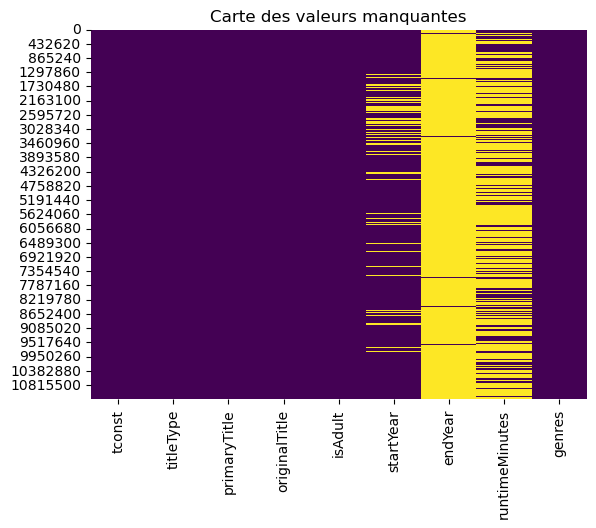

In [29]:
# 5. Identifier les valeurs manquantes

missing_values = df_title_basics.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Visualisation des valeurs manquantes : NE FONCTIONNE PAS A MODIFIER
sns.heatmap(df_title_basics.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()


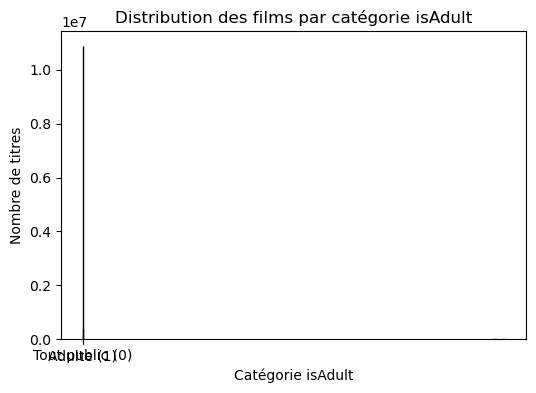

Proportions des catégories isAdult (%):
isAdult
0.0       96.780211
1.0        3.214170
1985.0     0.000702
1980.0     0.000560
1978.0     0.000480
1984.0     0.000365
1982.0     0.000284
1974.0     0.000284
1972.0     0.000258
2015.0     0.000249
1983.0     0.000222
2016.0     0.000187
1977.0     0.000178
1981.0     0.000160
1973.0     0.000160
1975.0     0.000160
1976.0     0.000160
2017.0     0.000151
1986.0     0.000151
1979.0     0.000116
1987.0     0.000116
2018.0     0.000080
2020.0     0.000080
2013.0     0.000071
2019.0     0.000062
2023.0     0.000062
2014.0     0.000053
1966.0     0.000044
1988.0     0.000044
2024.0     0.000036
1968.0     0.000027
1970.0     0.000018
1971.0     0.000018
2022.0     0.000018
2021.0     0.000009
2012.0     0.000009
2011.0     0.000009
1969.0     0.000009
1964.0     0.000009
1967.0     0.000009
2005.0     0.000009
Name: count, dtype: float64


In [25]:
# 6. Étudier la distribution des colonnes

# Analyse et visualisation de isAdult
is_adult_counts = df_title_basics['isAdult'].value_counts()

# Graphique en barres pour isAdult
plt.figure(figsize=(6, 4))
plt.bar(is_adult_counts.index, is_adult_counts.values, color=['lightgreen', 'orange'], edgecolor='black')
plt.xticks([0, 1], labels=['Tout public (0)', 'Adulte (1)'])
plt.xlabel('Catégorie isAdult')
plt.ylabel('Nombre de titres')
plt.title('Distribution des films par catégorie isAdult')
plt.show()

# Afficher les proportions
proportions = is_adult_counts / is_adult_counts.sum() * 100
print("Proportions des catégories isAdult (%):")
print(proportions)



In [ ]:
# 7. Vérifier la présence de doublons (NE MARCHE PAS AVEC LE FORMAT LISTE SUR LE GENRE, ça marchait avant reformatage de object)

duplicated_rows = df_title_basics[df_title_basics.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")


In [ ]:
# 8. Explorer les relations entre les colonnes (PAS UTILE SUR NOTRE DATASET, car pas de données numériques, seulement dates et catégories)

# Corrélation entre variables numériques :

correlation_matrix = df_title_basics.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

# Relations entre variables :

sns.pairplot(df_title_basics.select_dtypes(include=[np.number]))
plt.show()



In [ ]:
# 9. Étudier les valeurs aberrantes (NE MARCHE PAS)

for col in df_title_basics.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=data[col])
    plt.title(f"Boîte à moustaches pour {col}")
    plt.show()


NameError: name 'data' is not defined

# 10. Résumer vos observations (à compléter)

À la fin de l'EDA, résumez les points clés :

    Les dimensions et caractéristiques globales du jeu de données.
    Les colonnes contenant des valeurs manquantes et les stratégies possibles pour les gérer (suppression, imputation, etc.).
    Les relations et patterns identifiés entre les variables.
    Les colonnes avec des valeurs aberrantes ou une distribution inhabituelle.

Étapes supplémentaires (optionnelles)

    Encodage des colonnes catégoriques pour les analyses futures.
    Analyse des chronologies si les données contiennent des horodatages.
    Préparation pour la modélisation : Normalisation, scalage, ou transformations spécifiques.

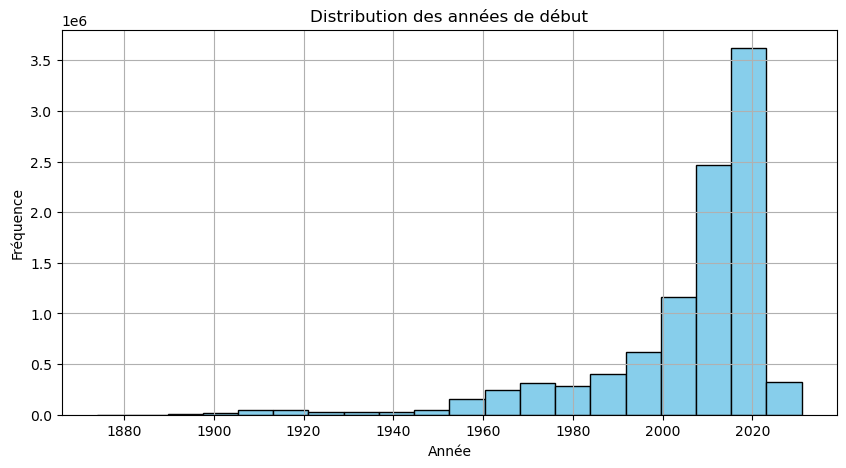

In [ ]:
# Explorer la distribution temporelle

# Histogramme des années : 

df_title_basics['startYear'].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title("Distribution des années de début")
plt.xlabel("Année")
plt.ylabel("Fréquence")
plt.show()


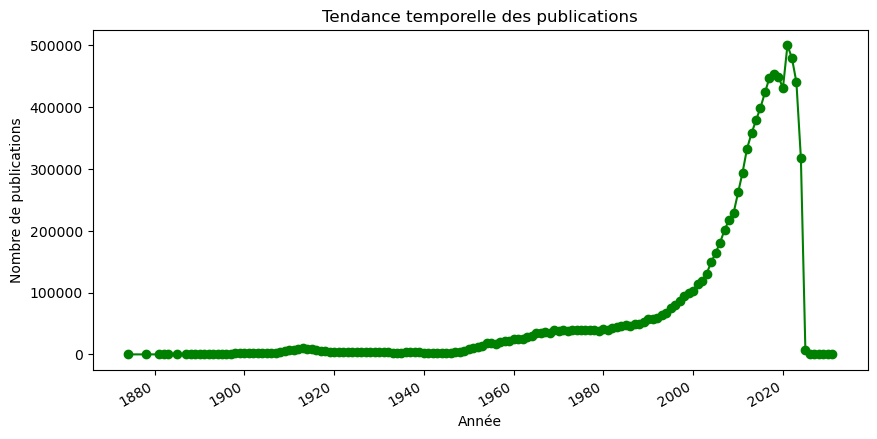

In [22]:
# Analyse des séries temporelles

# Grouper par année et calculer le nombre d'occurrences
yearly_counts = df_title_basics.groupby('startYear').size()

# Visualisation
yearly_counts.plot(kind='line', figsize=(10, 5), marker='o', color='green')
plt.title("Tendance temporelle des publications")
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.show()


    decade  film_count
0   1870.0          32
1   1880.0          79
2   1890.0        6080
3   1900.0       25762
4   1910.0       72552
5   1920.0       36950
6   1930.0       32655
7   1940.0       29349
8   1950.0      159490
9   1960.0      311617
10  1970.0      388484
11  1980.0      456860
12  1990.0      737310
13  2000.0     1606215
14  2010.0     3794551
15  2020.0     2173053
16  2030.0          12


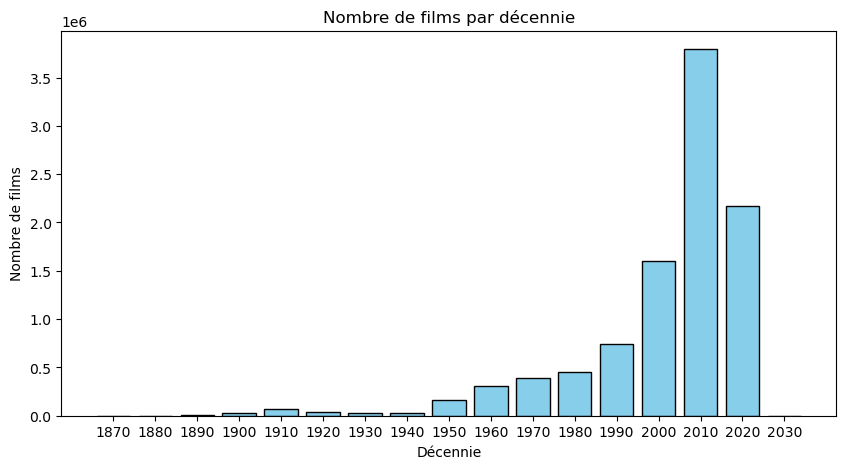

In [24]:
# Décennie = année - (année % 10)
df_title_basics['year'] = df_title_basics['startYear'].dt.year
df_title_basics['decade'] = (df_title_basics['year'] // 10) * 10

# Compter le nombre de films par décennie
films_per_decade = df_title_basics.groupby('decade').size().reset_index(name='film_count')

# Afficher les résultats
print(films_per_decade)

# Visualiser
plt.figure(figsize=(10, 5))
plt.bar(films_per_decade['decade'], films_per_decade['film_count'], width=8, color='skyblue', edgecolor='black')
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par décennie')
plt.xticks(films_per_decade['decade'])
plt.show()
